# Wordle Data Project:

Overview: Wordle is a puzzle game run by The New York Times with a new solution every morning. I've enjoyed playing it with my entire family, including my grandparents who play it every morning together! On Twitter, people will post hints to the solution as well as their guesses. I found a dataset containing those tweets by Ben Hamner on Kaggle (https://www.kaggle.com/datasets/benhamner/wordle-tweets) and decided to look into what I could find!

Rules: To "solve" the wordle for the day, you have 6 tries to guess a 5 letter word. The color of the letter determines if 1. The letter is not in the word = Grey, 2. In the word but not in the correct place = Yellow, or 3. In the word and the correct place = Green. 

Sample:

In [147]:
from IPython.display import Image
Image(url = 'https://epe.brightspotcdn.com/dims4/default/218d678/2147483647/strip/true/crop/1695x1150+13+0/resize/840x570!/format/webp/quality/90/?url=https%3A%2F%2Fepe-brightspot.s3.amazonaws.com%2F63%2F28%2Fde4bad4f405ea84452275b46b7df%2Fwordle-02022022.jpg')

# Importing Packages

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading, Cleaning, Transforming Data

In [149]:
og_wordle = pd.read_csv('C:\\Users\\ASUS\\Documents\\DS_data\\Wordle_tweets.csv')
wordle = pd.read_csv('C:\\Users\\ASUS\\Documents\\DS_data\\Wordle_tweets.csv')

I created 2 dataframes that are from the same data so that we have an "original" copy of the dataframe to refer to after we look at the transformed dataframe.

In [150]:
og_wordle.head(5).append(og_wordle.tail(5))

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩
887311,427,1561156070969581568,2022-08-21 00:59:46+00:00,golauco,Wordle 427 6/6\n\n🟩⬛⬛⬛⬛\n🟩⬛🟨⬛⬛\n🟩🟨⬛🟨🟨\n🟩🟨🟨🟨⬛\n...
887312,427,1561156092884819969,2022-08-21 00:59:52+00:00,Camelia_Phoenix,Wordle 427 4/6\n\n⬛⬛🟨🟨⬛\n⬛⬛⬛🟨🟨\n🟨🟨🟨⬛⬛\n🟩🟩🟩🟩🟩
887313,427,1561156150665658368,2022-08-21 01:00:05+00:00,joshua_hull,Wordle 427 5/6\n\n⬛🟨🟨🟨⬛\n🟨⬛⬛🟨🟨\n🟨⬛🟩🟨🟩\n⬛🟩🟩🟩🟩\n...
887314,427,1561156258094125056,2022-08-21 01:00:31+00:00,mzhangalang,Wordle 427 2/6\n\n⬛🟨🟨🟨🟨\n🟩🟩🟩🟩🟩\n\nYay yay!
887315,427,1561156341736976384,2022-08-21 01:00:51+00:00,hederaLC,Wordle 427 3/6\n\n⬛⬛🟨⬛⬛\n⬛🟨🟨🟨🟨\n🟩🟩🟩🟩🟩


This dataframe has enough information to start working with it immediately, but I'd like to add some more dimensions so that I can dig deeper into the data.

In [151]:
wordle['tweet_date_time'] = pd.to_datetime(wordle['tweet_date'])
wordle = wordle.drop(['tweet_date'], axis=1)
wordle['tweet_day'] = wordle['tweet_date_time'].dt.date
wordle['tweet_day_of_week_name'] = wordle['tweet_date_time'].dt.day_name()
wordle['tweet_day_of_week_num'] = wordle['tweet_date_time'].dt.day_of_week
wordle['tweet_year'] = wordle['tweet_date_time'].dt.year

Changing the "tweet_date" field to a date/time field allows me to parse out specific date information like "tweet_day", "tweet_year", etc. 

In [152]:
wordle['guess_number'] = wordle['tweet_text'].str[11].astype('int')
wordle['wordle_id'] = wordle['wordle_id'].astype('int')

Adding some extra info like number of guesses the tweet says it took to guess the correct answer in "guess_number" as well as changing some data types to better reflect what the text says.

In [153]:
wordle.head(5)

,wordle_id,tweet_id,tweet_username,tweet_text,tweet_date_time,tweet_day,tweet_day_of_week_name,tweet_day_of_week_num,tweet_year,guess_number
0,210,1482553374591660037,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,2022-01-16,Sunday,6,2022,4
1,210,1482553387937898499,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,2022-01-16,Sunday,6,2022,4
2,210,1482553422276698113,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,2022-01-16,Sunday,6,2022,4
3,210,1482553436910628866,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,2022-01-16,Sunday,6,2022,3
4,210,1482553445726908420,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,2022-01-16,Sunday,6,2022,3


Looking much better! Now time to create some graphs.

# Data Analysis/Graphs

Let's take a look at how many guesses it takes to get the correct answer for the first couple wordles.

In [154]:
wordle.groupby('wordle_id')['guess_number'].value_counts().unstack().head(11) \
.style.background_gradient(axis=1, cmap = sns.light_palette("seagreen", as_cmap=True))

guess_number,2,3,4,5,6
wordle_id,,,,,
210,222,897,1064,489,165
211,196,903,1016,564,215
212,191,787,820,413,188
213,51,260,630,697,481
214,383,1012,823,363,122
215,246,877,1017,579,224
216,461,1952,2078,1199,415
217,102,566,1031,843,418
218,170,1009,1384,730,187


Interesting to see that the most common amount of guesses is 4 rather than 5+. It makes sense that 2 is the lowest number of guesses since the player is working off of the least amount of information compared to any other point. We can make a reasonable conclusion that when the highest number of guesses is 3, the wordle was easier than normal, nice versa with 5 guesses. Let's take a different look at this data.

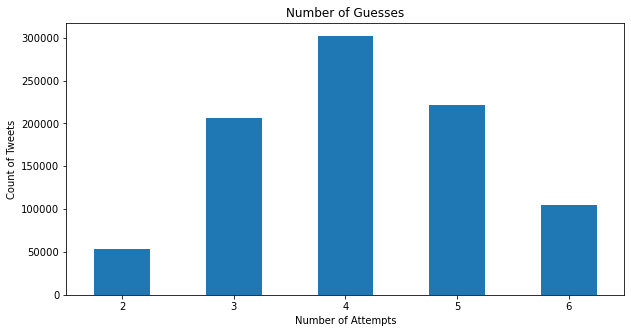

In [155]:
num_guesses = wordle['guess_number'].value_counts().sort_index().plot(title = 'Number of Guesses', figsize = (10, 5), kind = 'bar')
num_guesses.set_xlabel('Number of Attempts')
num_guesses.set_ylabel('Count of Tweets')
num_guesses.tick_params(axis = 'x', rotation = 0)

If we take out the wordle_id and just look at the guess_number, we can see a bar chart that perfectly represents the data from above. How about based on the day of the week?

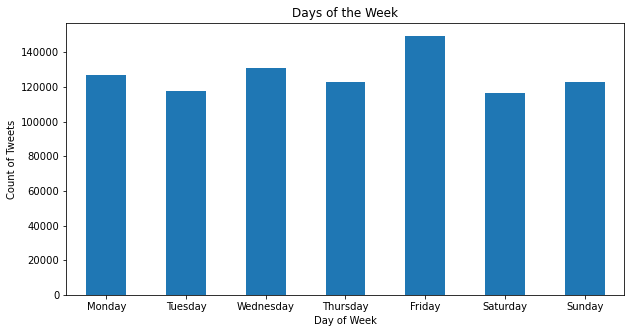

In [156]:
day_of_week = wordle['tweet_day_of_week_num'].value_counts().sort_index().plot(title = 'Days of the Week', figsize = (10, 5), kind = 'bar')
day_of_week.set_xlabel('Day of Week')
day_of_week.set_ylabel('Count of Tweets')
day_of_week.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_of_week.tick_params(axis = 'x', rotation = 0)

Looks like people love tweeting about wordle at the end of the work week! Although Friday has the top value of the graph, this does not necessarily mean that people play the most on Friday, only that they tweet the most on Friday. I would need to receive the proprietary game info from NYT to create that conclusion.

In [157]:
wordle['tweet_text'].str[16:21]

0         ⬛⬛🟨🟨⬛
1         ⬜⬜⬜⬜⬜
2         ⬜⬜⬜🟨⬜
3         ⬜⬜🟨⬜⬜
4         ⬛⬛🟨⬛⬛
          ...  
887311    🟩⬛⬛⬛⬛
887312    ⬛⬛🟨🟨⬛
887313    ⬛🟨🟨🟨⬛
887314    ⬛🟨🟨🟨🟨
887315    ⬛⬛🟨⬛⬛
Name: tweet_text, Length: 887316, dtype: object

Looks like there is some inconsistency with how the squares look. This is something I didn't catch earlier, but have a quick fix for!

In [158]:
wordle['tweet_text'] = wordle['tweet_text'].str.replace('⬛','⬜')

Let's run the line of code again.

In [159]:
wordle['tweet_text'].str[16:21]

0         ⬜⬜🟨🟨⬜
1         ⬜⬜⬜⬜⬜
2         ⬜⬜⬜🟨⬜
3         ⬜⬜🟨⬜⬜
4         ⬜⬜🟨⬜⬜
          ...  
887311    🟩⬜⬜⬜⬜
887312    ⬜⬜🟨🟨⬜
887313    ⬜🟨🟨🟨⬜
887314    ⬜🟨🟨🟨🟨
887315    ⬜⬜🟨⬜⬜
Name: tweet_text, Length: 887316, dtype: object

Much Better. Now let's see what % of people have at least 1 correct letter in the correct spot on the first guess.

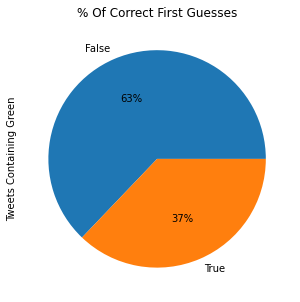

In [160]:
first_guess = wordle['tweet_text'].str[16:21].str.contains('🟩')
first_guess = first_guess.value_counts().plot(title = "% Of Correct First Guesses", figsize = (15, 5), kind = 'pie', \
autopct='%.0f%%').set_ylabel('Tweets Containing Green')

Interesting! About 2/3rds of the first guess doesn't contain the correct letter in the correct place, but what about a correct letter in ANY place?

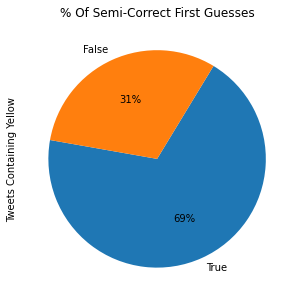

In [161]:
first_guess_y = wordle['tweet_text'].str[16:21].str.contains('🟨')
first_guess_y = first_guess_y.value_counts().plot(title = "% Of Semi-Correct First Guesses", figsize = (15, 5), kind = 'pie', \
autopct='%.0f%%', startangle = -190).set_ylabel('Tweets Containing Yellow')

The numbers have almost entirely flipped! This would make sense because it is easier to get a correct letter in ANY spot instead of in the correct spot!

As the last piece of information I want to pull from this data, I'd like to see how many people are repeat tweeters instead of just tweeting once.

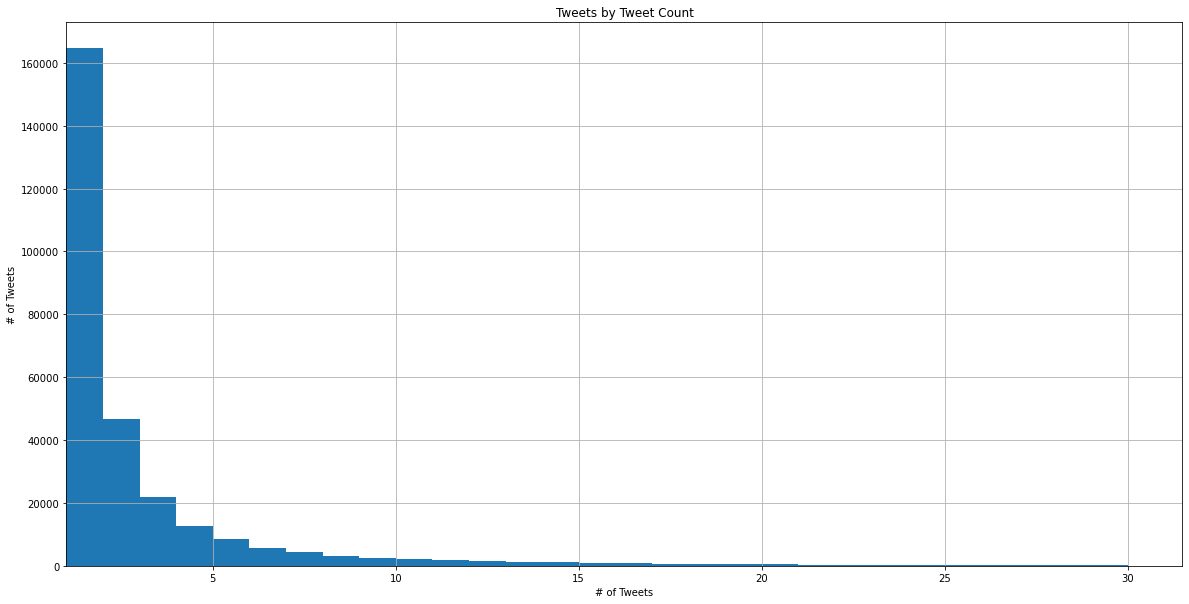

In [162]:
number_of_tweets = wordle['tweet_username'].value_counts().hist(figsize = (20, 10), range = (0, 30), bins = 30)
number_of_tweets.set_title('Tweets by Tweet Count')
number_of_tweets.set_xlabel('# of Tweets')
number_of_tweets.set_ylabel('# of Tweets')
number_of_tweets.set_xlim(1)
number_of_tweets.tick_params(axis = 'x', rotation = 0)

I could just pull if the person has tweeted once, but I thought this visualization is much more interesting. The vast majority of people only tweet 1 time! There is a smaller group of people that tweet anywhere from 2-10 times, but after that, the return tweeters are few and far between. There are people that reach higher than the upper limit of this graph, but they are so small that they don't show up since our y-axis reaches so high.

# Parting Thoughts

I doubt this information will make me become a Wordle pro, but still was a great project to flex my skills using pandas/ matplotlib and answering some of my questions that I have had after playing for 3 months!